# Pre-Processing

## Dataset import and initial assesment

In [1]:
import numpy as np
import pandas as pd
#import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("reddit_opinion_PSE_ISR.csv")

In [3]:
a = df

In [4]:
df.head()

,comment_id,score,self_text,subreddit,created_time,post_id,author_name,controversiality,ups,downs,...,user_link_karma,user_comment_karma,user_total_karma,post_score,post_self_text,post_title,post_upvote_ratio,post_thumbs_ups,post_total_awards_received,post_created_time
0,kvmer6g,1,What is this supposed to prove? That nobody in...,IsraelPalestine,2024-03-19 19:18:08,1biqebd,tinamnstrrr,0,1,0,...,412.0,4949.0,5371.0,0,"So, Mr. Netanyahu, and supporters, are you goo...",article: Famine in northern Gaza is imminent a...,0.36,0,0,2024-03-19 17:48:02
1,kvmepe5,1,If only there was an armed military force near...,worldnews,2024-03-19 19:17:51,1bik6xp,seclifered,0,1,0,...,1126.0,3430.0,4556.0,685,NaN,Local Gaza gangs are ‘robbing displaced Palest...,0.89,685,0,2024-03-19 13:25:00
2,kvmenpq,1,Taliban created and funded by america and isis...,IsraelPalestine,2024-03-19 19:17:35,1biqbsz,Accomplished_Mud6174,0,1,0,...,1.0,-33.0,-32.0,14,Most pro Palestine supporters who are not Arab...,Why is the West so concerned?,0.75,14,0,2024-03-19 17:45:08
3,kvmemm5,1,Recycling glass is still not economical or par...,worldnews,2024-03-19 19:17:25,1biqh0j,lordraiden007,0,1,0,...,182.0,37778.0,38228.0,519,NaN,The plastic industry knowingly pushed recyclin...,0.97,519,0,2024-03-19 17:51:10
4,kvmem94,1,The two have a private direct communication li...,worldnews,2024-03-19 19:17:22,1bis6xt,MajorTechnology8827,0,1,0,...,56.0,12422.0,12478.0,0,NaN,Biden privately told Netanyahu he's not trying...,0.50,0,0,2024-03-19 19:00:41


In [5]:
df.shape

(1033260, 24)

In [6]:
df.columns

Index(['comment_id', 'score', 'self_text', 'subreddit', 'created_time',
       'post_id', 'author_name', 'controversiality', 'ups', 'downs',
       'user_is_verified', 'user_account_created_time', 'user_awardee_karma',
       'user_awarder_karma', 'user_link_karma', 'user_comment_karma',
       'user_total_karma', 'post_score', 'post_self_text', 'post_title',
       'post_upvote_ratio', 'post_thumbs_ups', 'post_total_awards_received',
       'post_created_time'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1033260 entries, 0 to 1033259
Data columns (total 24 columns):
 #   Column                      Non-Null Count    Dtype  
---  ------                      --------------    -----  
 0   comment_id                  1033260 non-null  object 
 1   score                       1033260 non-null  int64  
 2   self_text                   1033256 non-null  object 
 3   subreddit                   1033260 non-null  object 
 4   created_time                1033260 non-null  object 
 5   post_id                     1033260 non-null  object 
 6   author_name                 1033260 non-null  object 
 7   controversiality            1033260 non-null  int64  
 8   ups                         1033260 non-null  int64  
 9   downs                       1033260 non-null  int64  
 10  user_is_verified            1033260 non-null  bool   
 11  user_account_created_time   1000879 non-null  object 
 12  user_awardee_karma          1033125 non-null  float64
 1

In [8]:
# Function to get the unique values count for all columns
def count_unique_values(df):
    unique_counts = {}
    for column in df.columns:
        unique_counts[column] = df[column].nunique()
    return unique_counts

In [9]:
unique_counts_dict = count_unique_values(df)
unique_counts_dict

{'comment_id': 1033260,
 'score': 2660,
 'self_text': 1009379,
 'subreddit': 14,
 'created_time': 982051,
 'post_id': 20272,
 'author_name': 168369,
 'controversiality': 2,
 'ups': 2660,
 'downs': 1,
 'user_is_verified': 2,
 'user_account_created_time': 166554,
 'user_awardee_karma': 5256,
 'user_awarder_karma': 4112,
 'user_link_karma': 24140,
 'user_comment_karma': 59654,
 'user_total_karma': 64991,
 'post_score': 2591,
 'post_self_text': 7163,
 'post_title': 19428,
 'post_upvote_ratio': 95,
 'post_thumbs_ups': 2591,
 'post_total_awards_received': 1,
 'post_created_time': 20237}

In [10]:
# Checking features with few unique values
few_unique_cols = {feature: count for feature, count in unique_counts_dict.items() if count <= 20}
few_unique_cols

{'subreddit': 14,
 'controversiality': 2,
 'downs': 1,
 'user_is_verified': 2,
 'post_total_awards_received': 1}

In [11]:
df[few_unique_cols.keys()].head()
# The data is collected from 14 subreddit categories
# User cerified - Yes/No

,subreddit,controversiality,downs,user_is_verified,post_total_awards_received
0,IsraelPalestine,0,0,True,0
1,worldnews,0,0,True,0
2,IsraelPalestine,0,0,True,0
3,worldnews,0,0,True,0
4,worldnews,0,0,True,0


In [12]:
df["user_is_verified"]

0           True
1           True
2           True
3           True
4           True
           ...  
1033255     True
1033256     True
1033257     True
1033258    False
1033259     True
Name: user_is_verified, Length: 1033260, dtype: bool

In [13]:
# Dropping "post_total_awards_received" and "downs" columns with just 1 unique value (Irrelevant)
df.drop(columns=["downs", "post_total_awards_received"],axis=1, inplace=True)

In [14]:
len(df.columns) # dropped 2 redudnat columns

22

In [15]:
# convert date_time columns from float to datetime type
date_time_cols = ['created_time', 'user_account_created_time', 'post_created_time']
for col in date_time_cols:
    df[col] = pd.to_datetime(df[col])

In [16]:
df.dtypes

comment_id                           object
score                                 int64
self_text                            object
subreddit                            object
created_time                 datetime64[ns]
post_id                              object
author_name                          object
controversiality                      int64
ups                                   int64
user_is_verified                       bool
user_account_created_time    datetime64[ns]
user_awardee_karma                  float64
user_awarder_karma                  float64
user_link_karma                     float64
user_comment_karma                  float64
user_total_karma                    float64
post_score                            int64
post_self_text                       object
post_title                           object
post_upvote_ratio                   float64
post_thumbs_ups                       int64
post_created_time            datetime64[ns]
dtype: object

In [17]:
len(df)

1033260

In [18]:
#Dropping records earlier to 7th October 2023 ("Operation Al-Aqsa Flood" Initiated)
start_date = pd.to_datetime('2023-10-07')

# Select data(posts+comments) starting from '2023-10-07'
df = df[(df['post_created_time'] >= start_date) & (df['created_time'] >= start_date)]

In [19]:
# Calculate the difference between max_date and min_date
date_difference = df.post_created_time.max() - df.post_created_time.min()

# Calculate years, months, and days
years = date_difference.days // 365
months = (date_difference.days % 365) // 30
days = (date_difference.days % 365) % 30

result = " Data covers a period of {" + f" {years} years, {months} months, {days} days"+ "}," + f" \n from ({df.post_created_time.dt.date.min()}) till ({df.post_created_time.dt.date.max()})"
print(result)

 Data covers a period of { 0 years, 5 months, 14 days}, 
 from (2023-10-07) till (2024-03-19)


## Missing Values

In [20]:
df.isnull().sum()

comment_id                        0
score                             0
self_text                         4
subreddit                         0
created_time                      0
post_id                           0
author_name                       0
controversiality                  0
ups                               0
user_is_verified                  0
user_account_created_time     32133
user_awardee_karma              135
user_awarder_karma              135
user_link_karma                 135
user_comment_karma              135
user_total_karma                135
post_score                        0
post_self_text               562324
post_title                        0
post_upvote_ratio                 0
post_thumbs_ups                   0
post_created_time                 0
dtype: int64

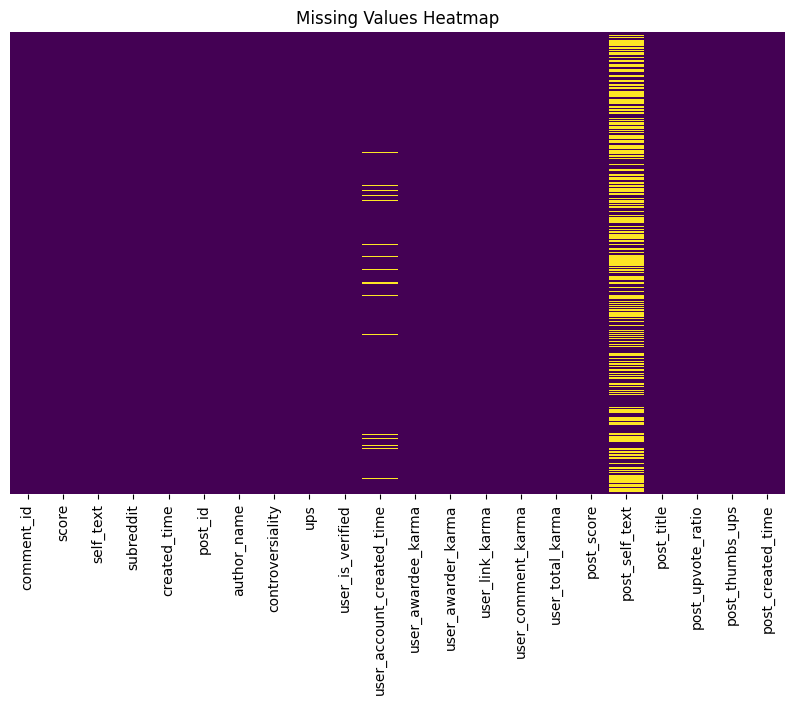

In [21]:
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cmap='viridis', cbar=False, yticklabels=False)
plt.title('Missing Values Heatmap')
plt.show()

In [22]:
# Evaluating Missing Values in Percentage
def percentage_missing(df):
    null_sum = df.isnull().sum()
    percent_nan = round(100  * null_sum / len(df), 4)
    percent_nan = percent_nan[percent_nan > 0].sort_values()
    return null_sum[percent_nan.index], percent_nan

null_sum, percent_nan = percentage_missing(df)

In [23]:
null_sum

self_text                         4
user_awardee_karma              135
user_awarder_karma              135
user_link_karma                 135
user_comment_karma              135
user_total_karma                135
user_account_created_time     32133
post_self_text               562324
dtype: int64

In [24]:
percent_nan

self_text                     0.0004
user_awardee_karma            0.0131
user_awarder_karma            0.0131
user_link_karma               0.0131
user_comment_karma            0.0131
user_total_karma              0.0131
user_account_created_time     3.1180
post_self_text               54.5649
dtype: float64

"post_self_text" has the most missing values more than 50%, but this doesn't necessarily mean posts lack content; it's due to the dataset structure where post details get repeated for each comment.

In [25]:
df['self_text'].fillna('NaN', inplace=True)

/var/folders/kx/vwf66kn17s153dgnqfn48k180000gn/T/ipykernel_2591/4023546145.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['self_text'].fillna('NaN', inplace=True)
/var/folders/kx/vwf66kn17s153dgnqfn48k180000gn/T/ipykernel_2591/4023546145.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['self_text'].fillna('NaN', inplace=True)


## Unique values and Duplications

In [26]:
len(df["post_title"].unique()) #title

19394

In [27]:
len(df["post_self_text"].unique()) # posts

7158

we have more titles than post content, because the same post could have been posted multiple times with different titles.

In [28]:
len(df["self_text"].unique()) # comments

1006767

In [29]:
#post to comment ratio
len(df["self_text"].unique())/len(df["post_self_text"].unique()) #for 1 post in average we have 141 comments

140.64920368818105

In [30]:
print(f" Duplicate comments: {df[['self_text']].duplicated().sum()}, i.e. {round(df[['self_text']].duplicated().sum()/len(df)*100,2)}%")

 Duplicate comments: 23792, i.e. 2.31%


In [31]:
print(f" Duplicate post content: {df[['post_self_text']].duplicated().sum()}, i.e. {round(df[['post_self_text']].duplicated().sum()/len(df)*100,2)}%")

 Duplicate post content: 1023401, i.e. 99.31%


In [32]:
print(f" Duplicate posts title: {df[['post_title']].duplicated().sum()}, i.e. {round(df[['post_title']].duplicated().sum()/len(df)*100,2)}%")

 Duplicate posts title: 1011165, i.e. 98.12%


In [33]:
print(f" Duplicate post content and its tile: {df[['post_title','post_self_text']].duplicated().sum()}, i.e. {round(df[['post_title','post_self_text']].duplicated().sum()/len(df)*100,2)}%")

 Duplicate post content and its tile: 1011032, i.e. 98.11%


In [34]:
#This data is redundant as the same comment for the same post under the same title (to be reomved)
print(f" Duplicate comments to be removed: {df[['post_title','post_self_text', 'self_text']].duplicated().sum()}, i.e. {round(df[['post_title','post_self_text', 'self_text']].duplicated().sum()/len(df)*100,2)}%")

 Duplicate comments to be removed: 3313, i.e. 0.32%


In [35]:
df_duplicated_posts = df[df[['post_title','post_self_text', 'self_text']].duplicated()]
post_self_text_counts = df_duplicated_posts[['post_title','post_self_text', 'self_text']].value_counts().reset_index()
post_self_text_counts.columns = ['post_title','post_self_text', 'self_text', 'count']
post_self_text_counts

,post_title,post_self_text,self_text,count
0,The host of our V-22 AMA has passed away.,*Written by* [*u/Minute\_Helicopter\_97*](http...,o7,44
1,How do the current military actions even by th...,To make it clear im not a pro palestinian or t...,Your account was detected as a ban evading acc...,13
2,Israel-affiliated merchant vessel hit by aeria...,Probably an Iranian drone imo,Nice,13
3,Israel/Palestine Discussion Thread - 12/2/23+,Discussion is going to be centralized here.\n\...,"Rule 1: Comments that are hateful, rude, offen...",12
4,Reports of execution of women and children in ...,Recent reports from a school in northern Gaza ...,Your account was detected as a ban evading acc...,10
...,...,...,...,...
1144,Is religion the main reason of the conflict,Christopher Hitchens (the famous atheist) said...,Your account was detected as a ban evading acc...,1
1145,Is that supposed to be Europe's hero ?,"""I do not admit ... for instance, that a great...",it doesn't matter. being scottish or any other...,1
1146,Is there actually a genocide? (good faith disc...,"Hey, as said in the title, I'm genuinely start...",No,1
1147,Is there any solution?,Under what conditions do you all believe that ...,Your account was detected as a ban evading acc...,1


In [36]:
#lets remove this
count_equals_1 = post_self_text_counts[post_self_text_counts['count'] == 1]
print("Number of rows with count equal to 1:", len(count_equals_1))
print("Number of 1 duplicated row out of all:", round(len(count_equals_1)/len(df_duplicated_posts)*100,2),"%")

Number of rows with count equal to 1: 935
Number of 1 duplicated row out of all: 28.22 %


In [37]:
#len of df before removing duplicates
len(df)

1030559

In [38]:
len(df)-len(df_duplicated_posts)

1027246

In [39]:
#len of df after removing duplicates
df.drop_duplicates(subset=['post_title', 'post_self_text', 'self_text'], inplace=True)
len(df)

/var/folders/kx/vwf66kn17s153dgnqfn48k180000gn/T/ipykernel_2591/2105190412.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop_duplicates(subset=['post_title', 'post_self_text', 'self_text'], inplace=True)


1027246

## Initial EDA

/var/folders/kx/vwf66kn17s153dgnqfn48k180000gn/T/ipykernel_2591/3381845545.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(['False', 'True'])


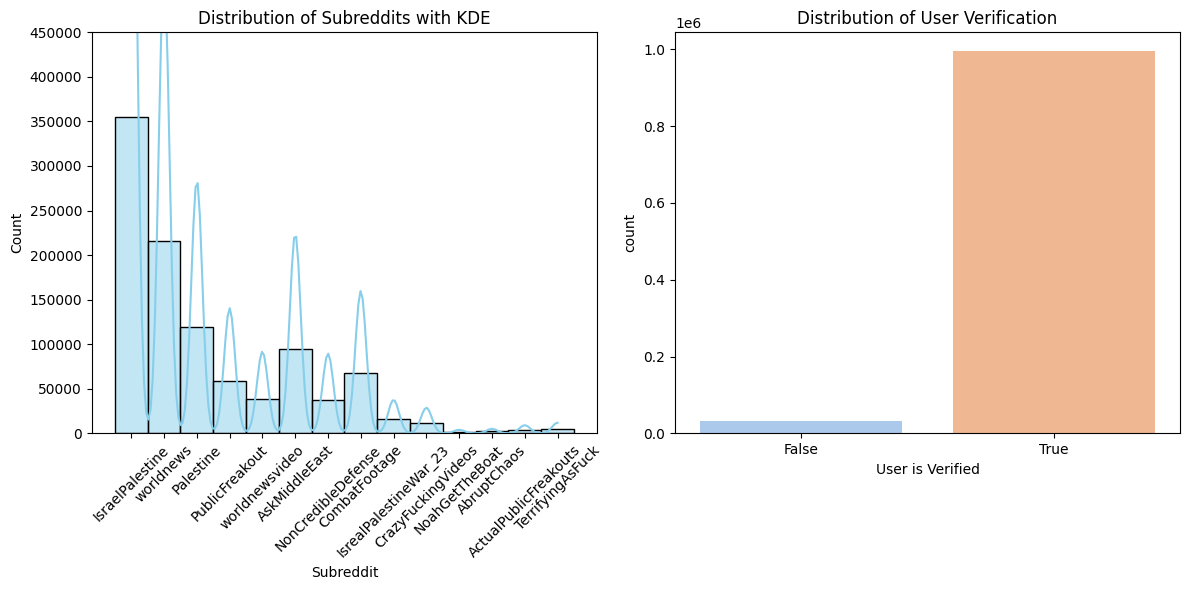

In [40]:
# 'subreddit' and 'user_is_verified'
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
# Plot for 'subreddit' column
sns.histplot(df['subreddit'], ax=axes[0], kde=True, color='skyblue')
axes[0].set_title('Distribution of Subreddits with KDE')
axes[0].set_xlabel('Subreddit')
axes[0].tick_params(axis='x', rotation=45)
axes[0].set_ylim(0, 450000)

# Plot for 'user_is_verified' column
sns.countplot(x='user_is_verified', data=df, ax=axes[1], palette='pastel', hue='user_is_verified', legend=False)
axes[1].set_title('Distribution of User Verification')
axes[1].set_xlabel('User is Verified')
axes[1].set_xticklabels(['False', 'True'])


plt.tight_layout()
plt.show()

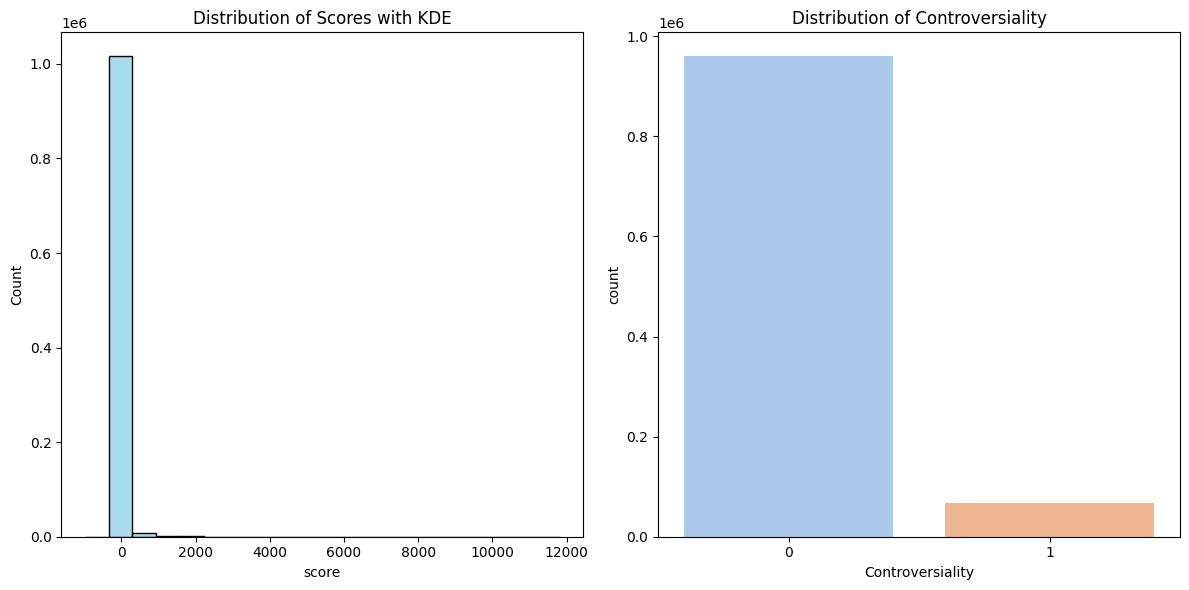

In [41]:

fig, axes = plt.subplots(1, 2, figsize=(12, 6))
# Plot for 'subreddit' column
sns.histplot(df['score'], ax=axes[0], color='skyblue', bins=20, alpha=0.7)
axes[0].set_title('Distribution of Scores with KDE')


# Plot for 'user_is_verified' column
sns.countplot(x='controversiality', data=df, ax=axes[1], palette='pastel', hue='controversiality', legend=False)
axes[1].set_title('Distribution of Controversiality')
axes[1].set_xlabel('Controversiality')
#axes[1].set_xticklabels(['False', 'True'])

plt.tight_layout()
plt.show()

In [42]:
#Distribution of posts over time

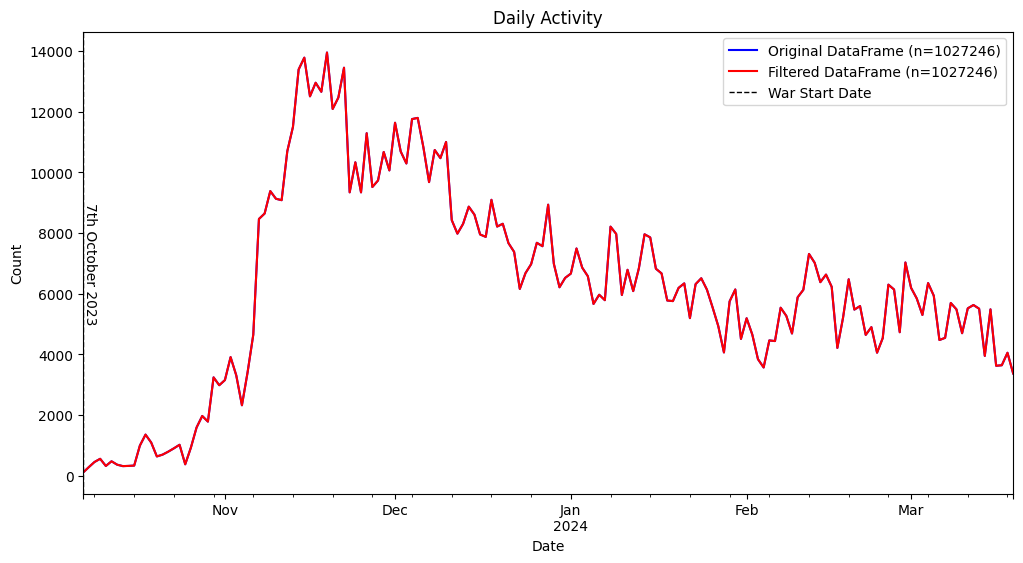

In [43]:
import pandas as pd
import matplotlib.pyplot as plt

# Set 'date_time' as index
#df.set_index('created_time', inplace=True)
df.set_index('created_time', inplace=True)

# Resample both Series by day and plot them with different colors
plt.figure(figsize=(12, 6))
df.resample('D').size().plot(color='blue', label=f'Original DataFrame (n={len(df)})')
df.resample('D').size().plot(color='red', label=f'Filtered DataFrame (n={len(df)})')

# Add vertical line and text annotation for filter start date
start_date = pd.to_datetime('2023-10-07')
plt.axvline(start_date, color='black', linestyle='dashed', linewidth=1, label='War Start Date')
plt.text(start_date, 9000, '7th October 2023', rotation=270, verticalalignment='top')

plt.xlabel('Date')
plt.ylabel('Count')
plt.title('Daily Activity')
plt.legend()
plt.show()


In [44]:
df.reset_index(inplace=True) #resetting index by removing "created_time" from index

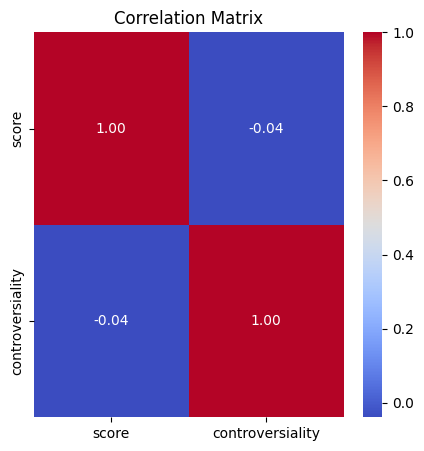

In [45]:
# Correlation between "score" and "controversiality"
correlation_matrix = df[["score", "controversiality"]].corr()
plt.figure(figsize=(5, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")         
plt.title('Correlation Matrix')
plt.show()
# The correlation between both the features are negligible

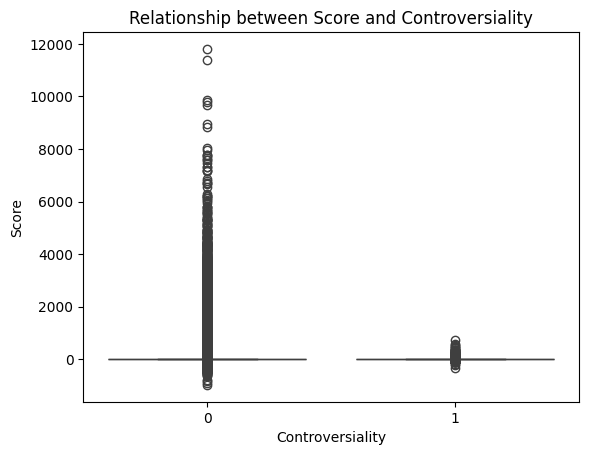

In [46]:
sns.boxplot(x='controversiality', y='score', data=df)
plt.xlabel('Controversiality')
plt.ylabel('Score')
plt.title('Relationship between Score and Controversiality')
plt.show()

When the controversiality is 0, which means when the upvotes and downvotes are not similar, then the score is high meaning that the upvotes is quite high compared to dowvotes.

When the controversiality is 1, the score is quite low meaning that the upvotes are similar to dowvotes.
Having this said, it will help us identify the bias in the post regarding Palestine or Israel.

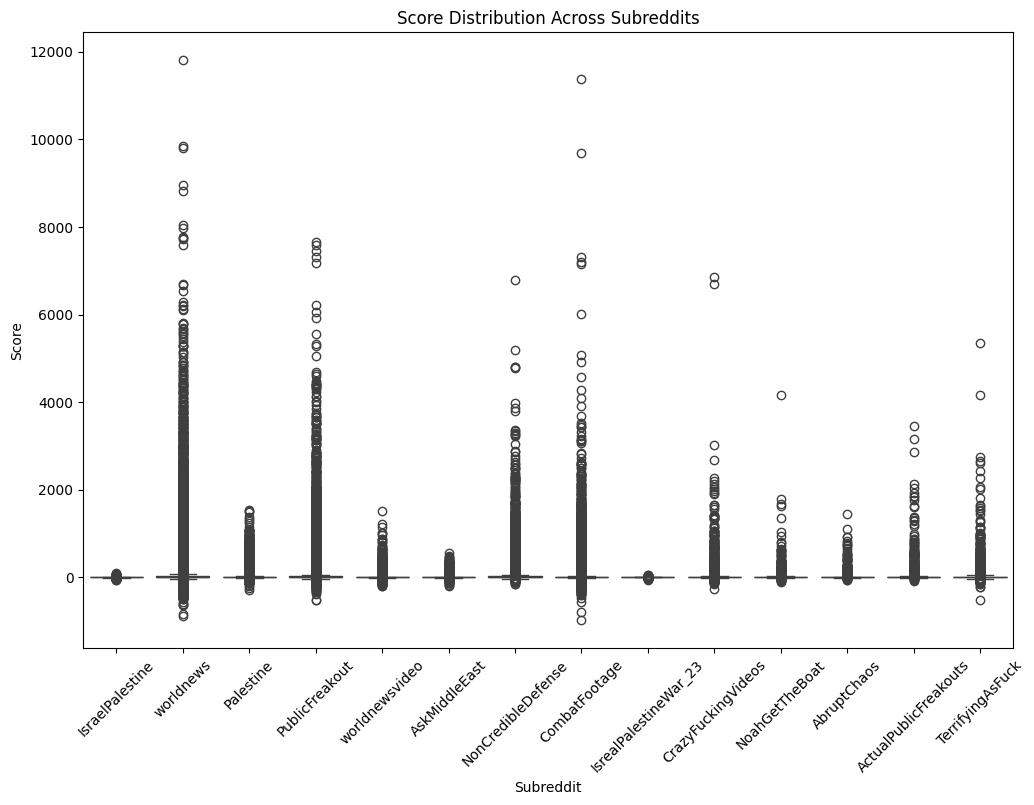

In [47]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='subreddit', y='score', data=df)
plt.title('Score Distribution Across Subreddits')
plt.xlabel('Subreddit')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.show()

Overall we can see that the scores are skewed towards upwards meaningnthat the upvotes are way higher than the downvotes. And, the reddit posts from worldnews, PublicFreakout and CombatFootage have highest score, while the rest are low compared to these 3.


# Text Processing

In [48]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
import re

In [49]:
# Preprocessing steps
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
        # Tokenization
        tokens = word_tokenize(str(text))

        # Lowercasing and Stopwords Removal
        #tokens = [word.lower() for word in tokens if word.lower() not in stop_words]

        # Punctuation and Special characters Removal, including removing the '#' symbol
        tokens = [word.lower() for word in tokens if word.isalnum()]

        # Remove URLs
        tokens = [re.sub(r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\\(\\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', '', word) for word in tokens]

        # Lemmatization
        tokens += [lemmatizer.lemmatize(word) for word in tokens]

        return tokens



In [50]:
df['post_title_tokens'] = df['post_title'].apply(preprocess_text)

/var/folders/kx/vwf66kn17s153dgnqfn48k180000gn/T/ipykernel_2591/1140411143.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['post_title_tokens'] = df['post_title'].apply(preprocess_text)


In [51]:
df['self_text_tokens'] = df['self_text'].apply(preprocess_text)

/var/folders/kx/vwf66kn17s153dgnqfn48k180000gn/T/ipykernel_2591/738814896.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['self_text_tokens'] = df['self_text'].apply(preprocess_text)


In [52]:
df['post_self_text_tokens'] = df['post_self_text'].apply(preprocess_text)

/var/folders/kx/vwf66kn17s153dgnqfn48k180000gn/T/ipykernel_2591/1341730162.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['post_self_text_tokens'] = df['post_self_text'].apply(preprocess_text)


In [72]:
df = pd.read_csv("pre_processed.csv")

ParserError: Error tokenizing data. C error: Calling read(nbytes) on source failed. Try engine='python'.

In [59]:
import numpy as np
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

# Initialize NLTK English stop words
nltk_stop_words = set(stopwords.words('english'))


# Load GloVe embeddings
def load_glove_embeddings(file_path):
    embeddings_index = {}
    with open(file_path, encoding="utf-8") as f:
        for line in f:
            values = line.split()
            word = values[0]
            coefs = np.asarray(values[1:], dtype='float32')
            embeddings_index[word] = coefs
    return embeddings_index

# Path to the downloaded GloVe embeddings
glove_embeddings_path = '/Users/arafathjazeeb/Library/CloudStorage/OneDrive-UniversityofPisa/Erasmus/Text Analytics/Project/glove.6B/glove.6B.300d.txt'  # Replace with the actual path to your GloVe file

# Load GloVe embeddings
glove_embeddings = load_glove_embeddings(glove_embeddings_path)

# Function to remove top 25% most frequent words that match with NLTK English stop words
def remove_top_5_percent(words):
    total_words = len(words)
    top_5_percent_count = int(total_words * 0.05)
    stop_words_set = set(stopwords.words('english'))
    
    # Filter out the words that are both in the top 5% and are NLTK English stop words
    top_5_percent_words = [word for word, score in words[:top_5_percent_count] if word in stop_words_set]
    return top_5_percent_words

# Function to compute GloVe scores for a given column
def compute_glove_scores(column):
    column = column.fillna('')
    # Initialize CountVectorizer
    count_vectorizer = CountVectorizer()
    X = count_vectorizer.fit_transform(column)
    
    # Initialize TfidfTransformer
    tfidf_transformer = TfidfTransformer()
    X = tfidf_transformer.fit_transform(X)
    
    # Calculate GloVe scores
    feature_names = count_vectorizer.get_feature_names_out()
    word_scores = {}
    for word in feature_names:
        if word in glove_embeddings:
            word_scores[word] = np.mean(glove_embeddings[word])
        else:
            word_scores[word] = 0.0

    sorted_words_scores = sorted(word_scores.items(), key=lambda x: x[1], reverse=True)
    return sorted_words_scores


In [63]:
df['post_title_tokens'][1]

['local',
 'gaza',
 'gangs',
 'are',
 'robbing',
 'displaced',
 'palestinians',
 'local',
 'gaza',
 'gang',
 'are',
 'robbing',
 'displaced',
 'palestinian']

In [69]:
words_title_gscore = compute_glove_scores(df['post_title_tokens'])

AttributeError: 'list' object has no attribute 'lower'

In [56]:
#Glove Score Calculating
words_title_gscore = compute_glove_scores(df['post_title_tokens'])
self_text_gscore = compute_glove_scores(df['self_text_tokens'])
post_self_text_gscore = compute_glove_scores(df['post_self_text_tokens'])

AttributeError: 'list' object has no attribute 'lower'

In [ ]:
#stopwords removed (from) top 5%frequent words in each column
removed_words_title = remove_top_5_percent(words_title_gscore)
removed_words_self = remove_top_5_percent(self_text_gscore)
removed_words_post_self = remove_top_5_percent(post_self_text_gscore)

NameError: name 'words_title_gscore' is not defined

In [68]:
#Stopwords Removal
import ast
# Replace NaN values with an empty list
df["self_text_tokens"].fillna('', inplace=True)
df["post_title_tokens"].fillna('', inplace=True)
df["post_self_text_tokens"].fillna('', inplace=True)

/var/folders/kx/vwf66kn17s153dgnqfn48k180000gn/T/ipykernel_2591/1232286063.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["self_text_tokens"].fillna('', inplace=True)
/var/folders/kx/vwf66kn17s153dgnqfn48k180000gn/T/ipykernel_2591/1232286063.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["self_text_tokens"].fillna('', inplace=T

In [ ]:

# Apply the operation to each row in the "self_text_tokens" column
df["self_text_tokens"] = df["self_text_tokens"].apply(lambda x: [word for word in ast.literal_eval(x) if word not in removed_words_self])
df["post_title_tokens"] = df["post_title_tokens"].apply(lambda x: [word for word in ast.literal_eval(x) if word not in removed_words_title])
df["post_self_text_tokens"] = df["post_self_text_tokens"].apply(lambda x: [word for word in ast.literal_eval(x) if word not in removed_words_post_self])

In [ ]:
df.head()

,created_time,comment_id,score,self_text,subreddit,post_id,author_name,controversiality,ups,user_is_verified,...,user_total_karma,post_score,post_self_text,post_title,post_upvote_ratio,post_thumbs_ups,post_created_time,post_title_tokens,self_text_tokens,post_self_text_tokens
0,2024-03-19 19:18:08,kvmer6g,1,What is this supposed to prove? That nobody in...,IsraelPalestine,1biqebd,tinamnstrrr,0,1,True,...,5371.0,0,"So, Mr. Netanyahu, and supporters, are you goo...",article: Famine in northern Gaza is imminent a...,0.36,0,2024-03-19 17:48:02,"[article, famine, in, northern, gaza, is, immi...","[what, is, this, supposed, to, prove, that, no...","[so, netanyahu, and, supporters, are, you, goo..."
1,2024-03-19 19:17:51,kvmepe5,1,If only there was an armed military force near...,worldnews,1bik6xp,seclifered,0,1,True,...,4556.0,685,NaN,Local Gaza gangs are ‘robbing displaced Palest...,0.89,685,2024-03-19 13:25:00,"[local, gaza, gangs, are, robbing, displaced, ...","[if, only, there, was, an, armed, military, fo...","[nan, nan]"
2,2024-03-19 19:17:35,kvmenpq,1,Taliban created and funded by america and isis...,IsraelPalestine,1biqbsz,Accomplished_Mud6174,0,1,True,...,-32.0,14,Most pro Palestine supporters who are not Arab...,Why is the West so concerned?,0.75,14,2024-03-19 17:45:08,"[why, is, the, west, so, concerned, why, is, t...","[taliban, created, and, funded, by, america, a...","[most, pro, palestine, supporters, who, are, n..."
3,2024-03-19 19:17:25,kvmemm5,1,Recycling glass is still not economical or par...,worldnews,1biqh0j,lordraiden007,0,1,True,...,38228.0,519,NaN,The plastic industry knowingly pushed recyclin...,0.97,519,2024-03-19 17:51:10,"[the, plastic, industry, knowingly, pushed, re...","[recycling, glass, is, still, not, economical,...","[nan, nan]"
4,2024-03-19 19:17:22,kvmem94,1,The two have a private direct communication li...,worldnews,1bis6xt,MajorTechnology8827,0,1,True,...,12478.0,0,NaN,Biden privately told Netanyahu he's not trying...,0.50,0,2024-03-19 19:00:41,"[biden, privately, told, netanyahu, he, not, t...","[the, two, have, a, private, direct, communica...","[nan, nan]"


In [ ]:
df.to_csv('pre_processed.csv', index=False)